In [2]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
# from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
# from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "red"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


In [ ]:
%%time
star = pd.read_csv("C:\\Users\\iamim\\OneDrive\\Desktop\\MLP_01\\star_classification.csv")

CPU times: total: 234 ms
Wall time: 686 ms


In [ ]:
star.info(memory_usage="deep")
print(colored("\nThis shows the DF and Series memory usage in bytes","red"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
star.memory_usage(deep=True)

# print(colored("\nthis easier to read, we convert all values to megabytes","red"))

Index              128
obj_ID          800000
alpha           800000
delta           800000
u               800000
g               800000
r               800000
i               800000
z               800000
run_ID          800000
rerun_ID        800000
cam_col         800000
field_ID        800000
spec_obj_ID     800000
class          6199929
redshift        800000
plate           800000
MJD             800000
fiber_ID        800000
dtype: int64

In [ ]:
star.memory_usage(deep=True) * 1e-6
# print(colored("memory usage","red"))

Index          0.000128
obj_ID         0.800000
alpha          0.800000
delta          0.800000
u              0.800000
g              0.800000
r              0.800000
i              0.800000
z              0.800000
run_ID         0.800000
rerun_ID       0.800000
cam_col        0.800000
field_ID       0.800000
spec_obj_ID    0.800000
class          6.199929
redshift       0.800000
plate          0.800000
MJD            0.800000
fiber_ID       0.800000
dtype: float64

In [ ]:
#Data Cleaning
df=star.copy
df

<bound method NDFrame.copy of              obj_ID       alpha      delta         u         g         r  \
0      1.240000e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.240000e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.240000e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.240000e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.240000e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.240000e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.240000e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.240000e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.240000e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.240000e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  fie

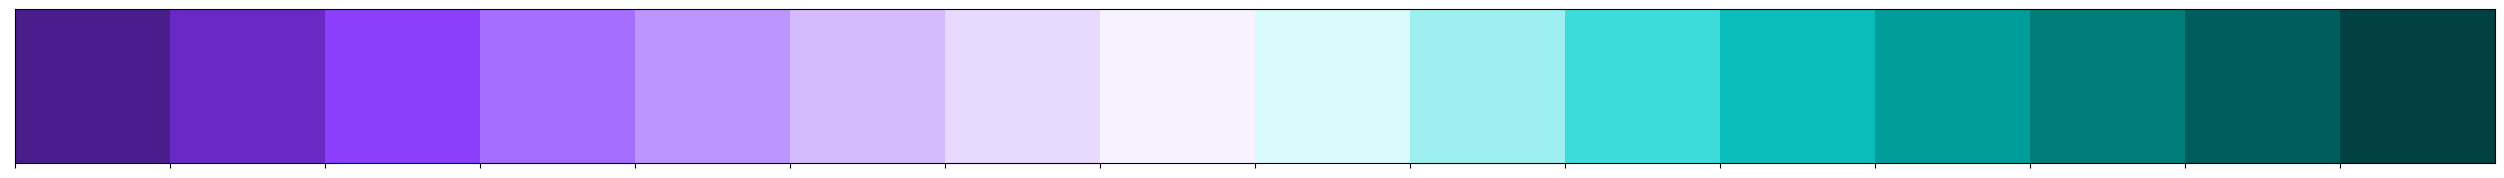

In [ ]:
patterns=[
 '#491d8b'
 ,'#6929c4'
 ,'#8a3ffc'
 ,'#a56eff'
 ,'#be95ff'
 ,'#d4bbff'
 ,'#e8daff'
 ,'#f6f2ff'
 ,'#d9fbfb'
 ,'#9ef0f0'
 ,'#3ddbd9'
 ,'#08bdba'
 ,'#009d9a'
 ,'#007d79'
 ,'#005d5d'
, '#004144'
]
sns.palplot(patterns, size = 2)

In [ ]:
df = star.copy()
df.head(n = 10).style.background_gradient(cmap = "Blues")

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1240000000000000000.000000,135.689107,32.494632,23.878820,22.275300,20.395010,19.165730,18.793710,3606,301,2,79,6540000000000000000.000000,GALAXY,0.634794,5812,56354,171
1,1240000000000000000.000000,144.826101,31.274185,24.777590,22.831880,22.584440,21.168120,21.614270,4518,301,5,119,11800000000000000000.000000,GALAXY,0.779136,10445,58158,427
2,1240000000000000000.000000,142.188790,35.582444,25.263070,22.663890,20.609760,19.348570,18.948270,3606,301,2,120,5150000000000000000.000000,GALAXY,0.644195,4576,55592,299
3,1240000000000000000.000000,338.741038,-0.402828,22.136820,23.776560,21.611620,20.504540,19.250100,4192,301,3,214,10300000000000000000.000000,GALAXY,0.932346,9149,58039,775
4,1240000000000000000.000000,345.282593,21.183866,19.437180,17.580280,16.497470,15.977110,15.544610,8102,301,3,137,6890000000000000000.000000,GALAXY,0.116123,6121,56187,842
5,1240000000000000000.000000,340.995120,20.589476,23.488270,23.337760,21.321950,20.256150,19.545440,8102,301,3,110,5660000000000000000.000000,QSO,1.424659,5026,55855,741
6,1240000000000000000.000000,23.234926,11.418188,21.469730,21.176240,20.928290,20.608260,20.425730,7773,301,2,462,12500000000000000000.000000,QSO,0.586455,11069,58456,113
7,1240000000000000000.000000,5.433176,12.065186,22.249790,22.021720,20.341260,19.487940,18.849990,7773,301,2,346,6960000000000000000.000000,GALAXY,0.477009,6183,56210,15
8,1240000000000000000.000000,200.290475,47.199402,24.402860,22.356690,20.610320,19.464900,18.958520,3716,301,5,108,7460000000000000000.000000,GALAXY,0.660012,6625,56386,719
9,1240000000000000000.000000,39.149691,28.102842,21.746690,20.034930,19.175530,18.818230,18.654220,5934,301,4,122,2750000000000000000.000000,STAR,-0.000008,2444,54082,232


In [ ]:
df.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.000000,1240000000000000000.000000,0.000000,1240000000000000000.000000,1240000000000000000.000000,1240000000000000000.000000,1240000000000000000.000000,1240000000000000000.000000
alpha,100000.000000,177.629117,96.502241,0.005528,127.518222,180.900700,233.895005,359.999810
delta,100000.000000,24.135305,19.644665,-18.785328,5.146771,23.645922,39.901550,83.000519
u,100000.000000,21.980468,31.769291,-9999.000000,20.352353,22.179135,23.687440,32.781390
g,100000.000000,20.531387,31.750292,-9999.000000,18.965230,21.099835,22.123767,31.602240
r,100000.000000,19.645762,1.854760,9.822070,18.135828,20.125290,21.044785,29.571860
i,100000.000000,19.084854,1.757895,9.469903,17.732285,19.405145,20.396495,32.141470
z,100000.000000,18.668810,31.728152,-9999.000000,17.460677,19.004595,19.921120,29.383740
run_ID,100000.000000,4481.366060,1964.764593,109.000000,3187.000000,4188.000000,5326.000000,8162.000000
rerun_ID,100000.000000,301.000000,0.000000,301.000000,301.000000,301.000000,301.000000,301.000000


In [ ]:
df.rename(columns={"u": "ultraviolet_filter", "g": "green_filter",
                    "r": "red_filter", "i": "near_infrared_filter",
                    "z": "infrared_filter"})

,obj_ID,alpha,delta,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,infrared_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,GALAXY,0.634794,5812,56354,171
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,GALAXY,0.779136,10445,58158,427
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,GALAXY,0.644195,4576,55592,299
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,GALAXY,0.932346,9149,58039,775
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.890000e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.240000e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.590000e+18,GALAXY,0.404895,7626,56934,866
99997,1.240000e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.110000e+18,GALAXY,0.143366,2764,54535,74
99998,1.240000e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.600000e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [ ]:
# Check for missing values
print(df.isnull().sum())


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64
